<a href="https://colab.research.google.com/github/me-smishra27/Ted-Talks-Views-Prediction/blob/main/Third_Commit_Ted_Talk_Views_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import ast
from nltk.corpus import stopwords
import string

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#IMPORT DATA

In [ ]:
filepath = '/content/drive/MyDrive/Colab Notebooks/Cohort_Himalaya_AlmaBetter/ML_CAPSTONE/Capstone 3-Ted_Talk_Views_Prediction/data_ted_talks.csv'
r_data = pd.read_csv(filepath)

In [ ]:
r_data.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Denisty plot for views')

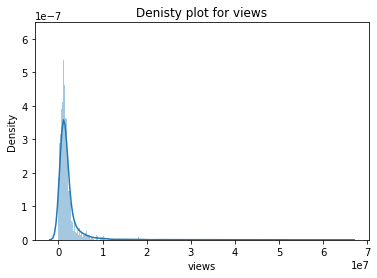

In [ ]:
sns.distplot(r_data['views'], bins = 1000)
plt.title('Denisty plot for views')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Denisty plot for comments')

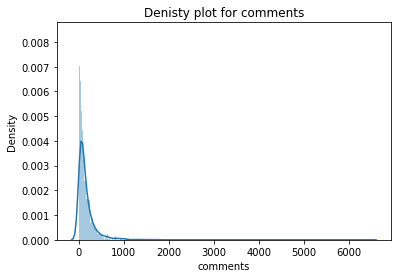

In [ ]:
sns.distplot(r_data['comments'], bins = 1000)
plt.title('Denisty plot for comments')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Denisty plot for duration')

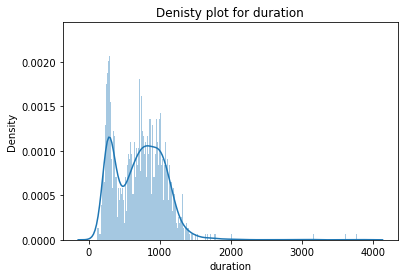

In [ ]:
sns.distplot(r_data['duration'], bins = 1000)
plt.title('Denisty plot for duration')

#Checking for duplicate Rows


In [ ]:
r_data.duplicated().sum()

0

#KNOWING DATA 

In [ ]:
r_data.shape

(4005, 19)

In [ ]:
r_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [ ]:
r_data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

#MISSING DATA

In [ ]:
r_data.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

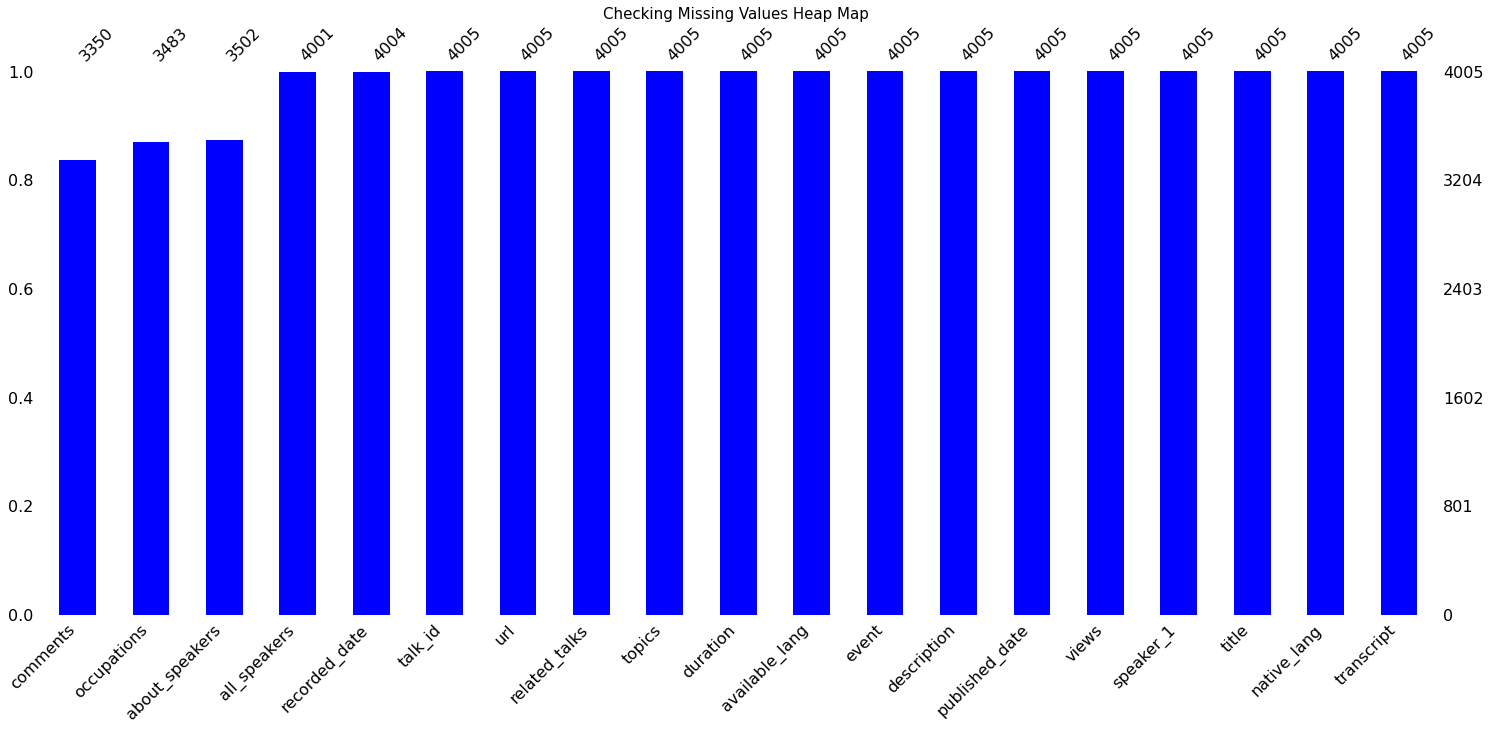

In [ ]:
mno.bar(r_data.iloc[:, :],
        color = 'blue',
        sort = 'ascending')
plt.title('Checking Missing Values Heap Map ', fontsize = 15)
plt.show()

#COPIED DATA / SET INDEX

In [ ]:
set_data = r_data.copy()

In [ ]:
set_data.set_index('talk_id', inplace = True)

In [ ]:
set_data.head(3)

,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
talk_id,,,,,,,,,,,,,,,,,,
1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."


#Title_Analysis

In [ ]:
set_data['title'].nunique()

4005

#Speaker_1 Analaysis

In [ ]:
set_data['speaker_1'].nunique()

NameError: ignored

In [ ]:
speaker_count = set_data['speaker_1'].value_counts().to_frame()
df_speaker_count = pd.DataFrame(speaker_count)
df_speaker_count = df_speaker_count.reset_index()
df_speaker_count.columns = ['Speaker_name', 'talks_delivered']

NameError: ignored

In [ ]:
most_talks = df_speaker_count.nlargest(20, 'talks_delivered')

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x = 'Speaker_name', y = 'talks_delivered', data = most_talks)

CONCLUSION
*   The max number of talk is delivered by Alex Gendler followed by the rest.



#MAX VIEWS WITH SPEAKER

In [ ]:
sp_view_df = set_data.nlargest(20, 'views')

In [ ]:
sp_view_df[['speaker_1', 'views']]

,speaker_1,views
talk_id,,
66,Sir Ken Robinson,65051954
1569,Amy Cuddy,57074270
2405,James Veitch,56932551
848,Simon Sinek,49730580
1042,Brené Brown,47544833
2034,Julian Treasure,41504331
2458,Tim Urban,37976820
1647,Cameron Russell,33874546
13587,Sam Berns,33691484


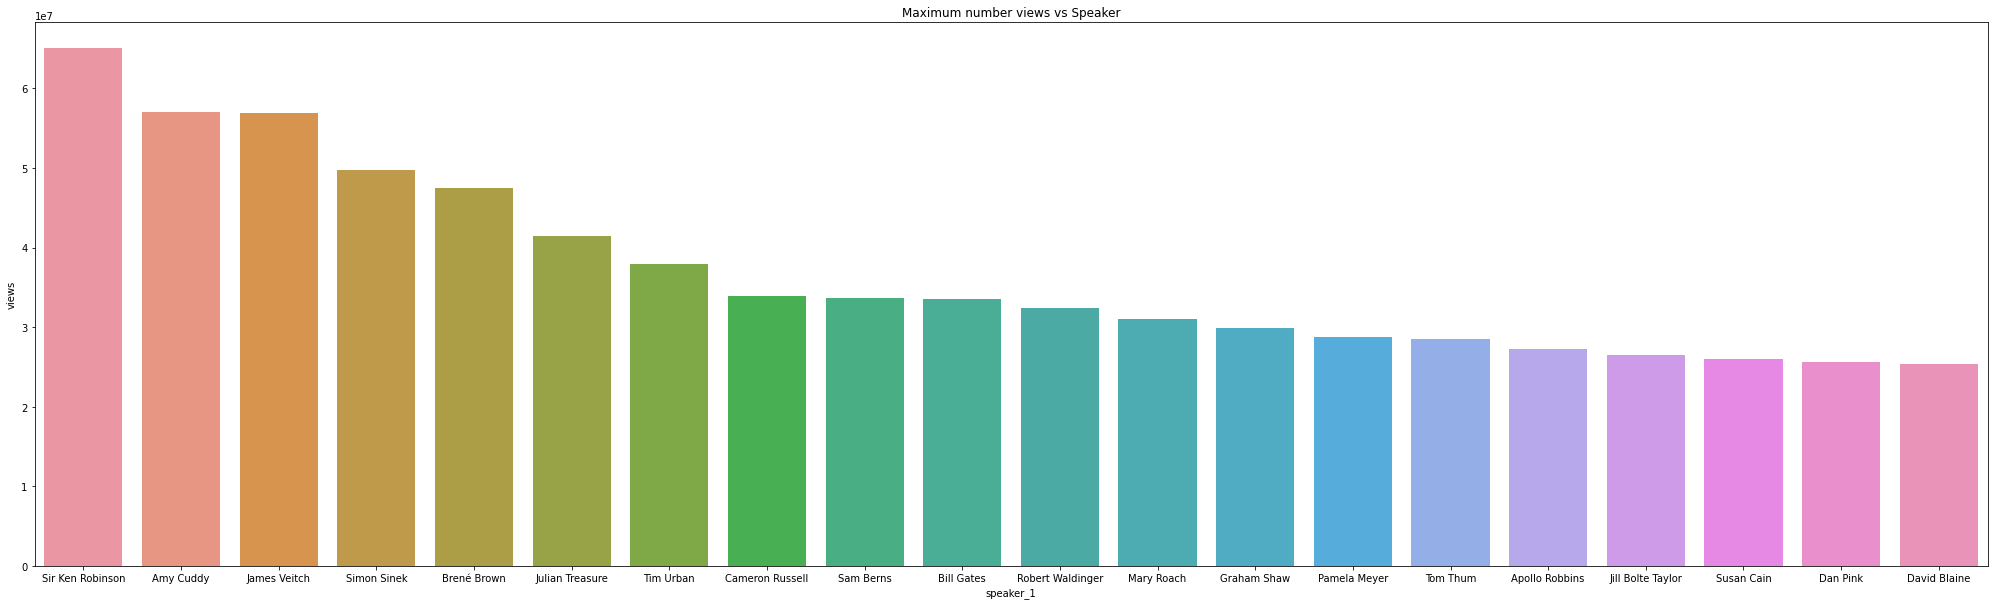

In [ ]:
plt.figure(figsize=(35,10))
plt.title('Maximum number views vs Speaker')
sns.barplot(x = 'speaker_1', y = 'views', data = sp_view_df )

#Speaker with total Views

In [ ]:
sp_tv = set_data.groupby('speaker_1').agg({'views' : 'sum'})
stv_res = sp_tv.nlargest(20, 'views')
stv_res.reset_index(inplace = True)

In [ ]:
stv_res

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


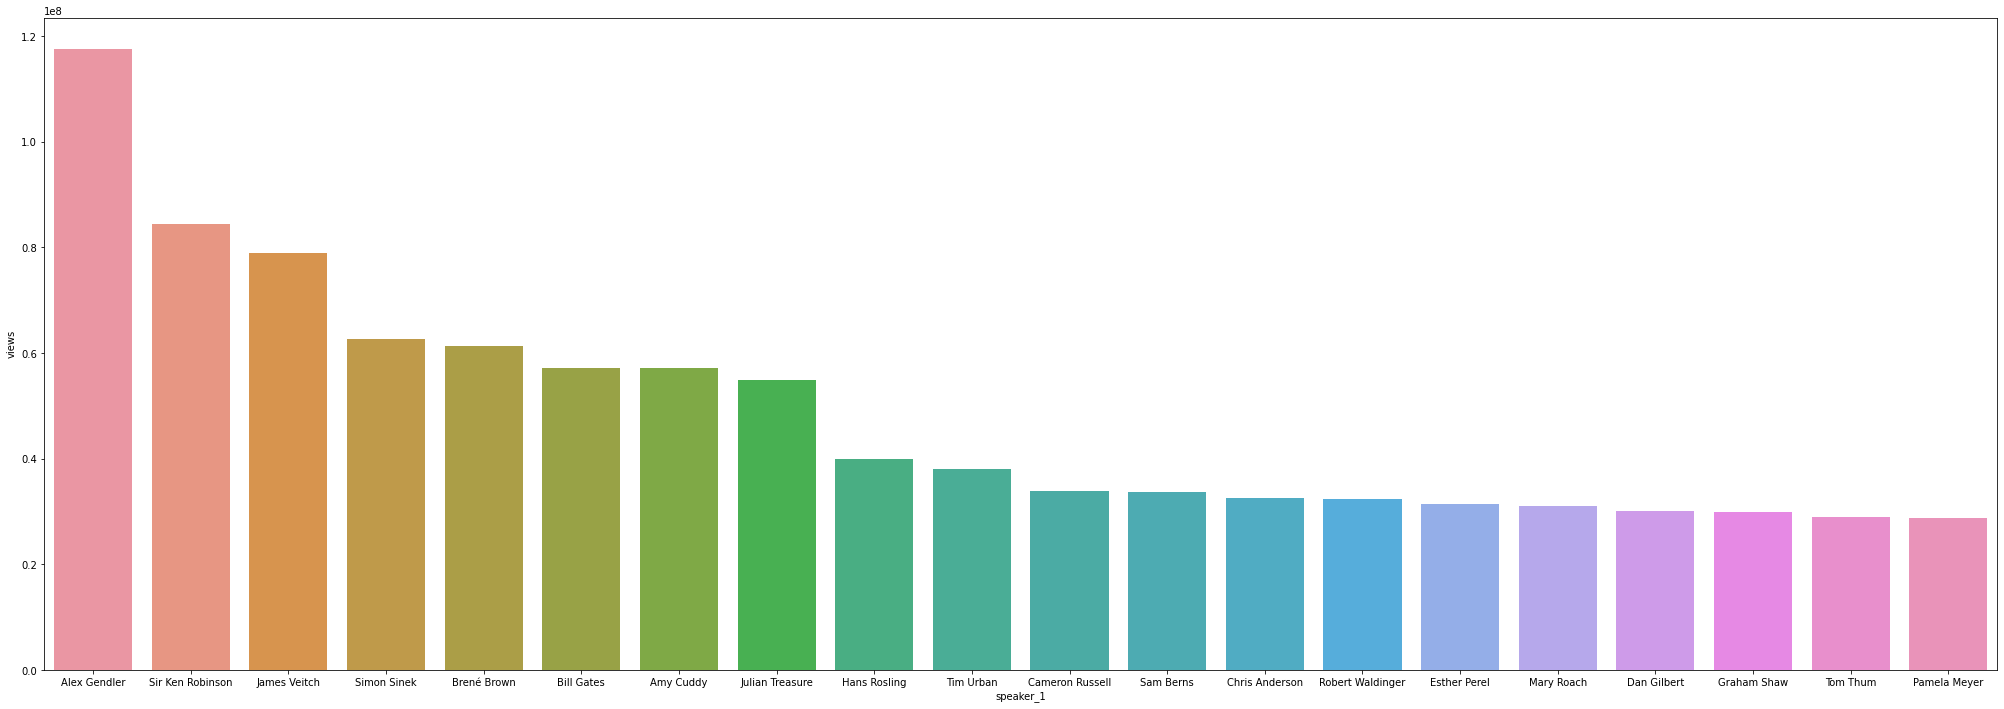

In [ ]:
plt.figure(figsize=(35, 12))
sns.barplot(x ='speaker_1', y='views', data=stv_res )

#all_speakers analysis 

In [ ]:
null_as = pd.isnull(set_data['all_speakers'])
set_data[null_as]

,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
talk_id,,,,,,,,,,,,,,,,,,
23418,How prefab homes can transform affordable housing,Antón García-Abril,NaN,NaN,NaN,14934,2016-11-19,2018-09-04,TEDxYouth@Beaconstreet,en,"['en', 'es']",NaN,449,"['design', 'architecture', 'industrial design'...","{1015: 'Creative houses from reclaimed stuff',...",https://www.ted.com/talks/anton_garcia_abril_h...,When architect Antón García-Abril moved to Bos...,Subtitle Provided by JUFE MOOC Studio M Subtit...
36384,Why we need to stop obsessing over World War II,Keith Lowe,NaN,NaN,NaN,103682,2014-11-15,2019-03-01,TEDxAthens,en,"['en', 'pt', 'sr']",NaN,1109,"['war', 'history', 'society', 'future', 'globa...","{1999: 'Why veterans miss war', 1651: 'What I ...",https://www.ted.com/talks/keith_lowe_why_we_ne...,Why are we so obsessed with World War II? Hist...,Hello everybody. Audience: Hello. Keith Lowe: ...
36844,Why talent carries you further than fame,Maisie Williams,NaN,NaN,NaN,3677746,2019-02-03,2019-03-11,TEDxManchester,en,"['ar', 'de', 'el', 'en', 'es', 'fr', 'hu', 'pt...",NaN,982,"['art', 'entertainment', 'entrepreneur', 'tech...",{39192: 'Why medieval politics was nothing lik...,https://www.ted.com/talks/maisie_williams_why_...,You'd never know from her transformation into ...,Hi. I'm Maisie Williams. And I'm kind of just ...
49223,Are we living in a simulation?,Zohreh Davoudi,NaN,NaN,NaN,485122,2019-10-08,2019-10-08,TED-Ed,en,"['ar', 'el', 'en', 'es', 'fa', 'fr', 'he', 'id...",NaN,249,"['TED-Ed', 'animation', 'education', 'technolo...","{26263: 'Does time exist?', 24106: 'How do you...",https://www.ted.com/talks/zohreh_davoudi_are_w...,"All life on Earth— living and inanimate, micro...","We live in a vast universe, on a small wet pla..."


In [ ]:
##Replace  nan all_speakers by speaker_1
set_data['all_speakers'].fillna(str({0:[str(set_data['speaker_1'])]}),inplace=True,axis=0)

In [ ]:
set_data['all_speakers']= set_data['all_speakers'].apply(lambda x: [val for val in ast.literal_eval(x).values()])

*   We can easily drop the 'all_speakers' or 'speaker_1' 

In [ ]:
# set_data.drop(['all_speakers'], axis = 1, inplace = True)

In [ ]:
set_data.head()

,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
talk_id,,,,,,,,,,,,,,,,,,
1,Averting the climate crisis,Al Gore,[Al Gore],{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
92,The best stats you've ever seen,Hans Rosling,[Hans Rosling],{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
7,Simplicity sells,David Pogue,[David Pogue],{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
53,Greening the ghetto,Majora Carter,[Majora Carter],{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
66,Do schools kill creativity?,Sir Ken Robinson,[Sir Ken Robinson],"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


#all_speakers_analysis_Part_2

In [ ]:
df = set_data.copy()

In [ ]:
df.head(3)

,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
talk_id,,,,,,,,,,,,,,,,,,
1,Averting the climate crisis,Al Gore,[Al Gore],{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
92,The best stats you've ever seen,Hans Rosling,[Hans Rosling],{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
7,Simplicity sells,David Pogue,[David Pogue],{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."


In [ ]:
lenL = []
for x in df['all_speakers']:
  lenL.append(len(x))
print(lenL)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
for elem in lenL:
  if elem == 1:
    count1 += 1
  elif elem == 2:
    count2 += 1
  elif elem == 3:
    count3 += 1
  elif elem == 4:
    count4 += 1
  else:
    count5 += 1
print(count1, count2, count3, count4, count5)

3891 97 13 3 1


In [ ]:
df['count_speakers'] = df['all_speakers'].apply(lambda x: len(x))

In [ ]:
sp_cnt = df['count_speakers'].value_counts()
sp_cnt

1    3891
2      97
3      13
4       3
5       1
Name: count_speakers, dtype: int64

In [ ]:
sp_ct = df.groupby('count_speakers').agg({'views' : 'sum'})
sp_ct.reset_index(inplace = True)

Text(0.5, 1.0, 'Number of Speakers vs total views')

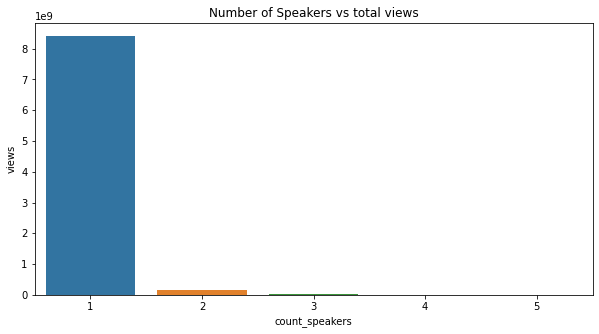

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x ='count_speakers', y='views', data=sp_ct)
plt.title('Number of Speakers vs total views')

1. We can drop all speakers coulmns from our dataset.

In [ ]:
set_data.drop(['all_speakers'], axis = 1, inplace = True)

#SET_DATA_WITH_DROPPED_ALL_SPEAKERS

In [ ]:
set_data.head()

,title,speaker_1,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
talk_id,,,,,,,,,,,,,,,,,
1,Averting the climate crisis,Al Gore,{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
92,The best stats you've ever seen,Hans Rosling,{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
7,Simplicity sells,David Pogue,{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
53,Greening the ghetto,Majora Carter,{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
66,Do schools kill creativity?,Sir Ken Robinson,"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


#NLP

In [ ]:
nlp_dat = r_data.copy()

In [ ]:
nlp_dat.head(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."


In [ ]:
title_nlp = nlp_dat[['title', 'views', 'duration']]

In [ ]:
title_nlp['title_length'] = title_nlp['title'].apply(len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
title_nlp.head()

,title,views,duration,title_length
0,Averting the climate crisis,3523392,977,27
1,The best stats you've ever seen,14501685,1190,31
2,Simplicity sells,1920832,1286,16
3,Greening the ghetto,2664069,1116,19
4,Do schools kill creativity?,65051954,1164,27


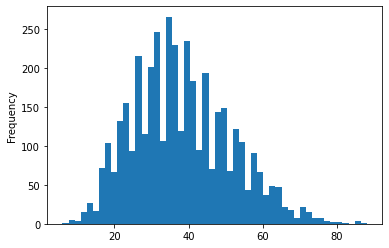

In [ ]:
title_nlp['title_length'].plot(bins = 50, kind = 'hist')

In [ ]:
title_nlp.title_length.describe()

count    4005.000000
mean       38.241199
std        13.191408
min         6.000000
25%        28.000000
50%        37.000000
75%        47.000000
max        88.000000
Name: title_length, dtype: float64

In [ ]:
title_nlp[title_nlp['title_length']==min(title_nlp['title_length'])]['title'].iloc[0]

'"Awoo"'

In [ ]:
title_nlp[title_nlp['title_length'] == max(title_nlp['title_length'])]['title'].iloc[0]

'The mysterious microbes living deep inside the earth -- and how they could help humanity'

In [ ]:
def title_cleaning(title):
  test_punc_remove = [ char for char in title if char not in string.punctuation]
  test_punc_remove_joined = ''.join(test_punc_remove)
  test_cleaned = [word for word in test_punc_remove_joined.split() if word.lower() not in stopwords.words('english')]
  return test_cleaned

In [ ]:
title_clean = title_nlp['title'].apply(title_cleaning)

In [ ]:
title_clean

0                      [Averting, climate, crisis]
1                 [best, stats, youve, ever, seen]
2                              [Simplicity, sells]
3                               [Greening, ghetto]
4                      [schools, kill, creativity]
                           ...                    
4000     [Crisis, support, world, one, text, away]
4001                    [dark, history, IQ, tests]
4002        [policing, profit, undermines, rights]
4003    [electrifying, speeches, Sojourner, Truth]
4004                      [important, anus, ocean]
Name: title, Length: 4005, dtype: object

In [ ]:
from wordcloud import WordCloud,ImageColorGenerator

Total 164855 words in the title.


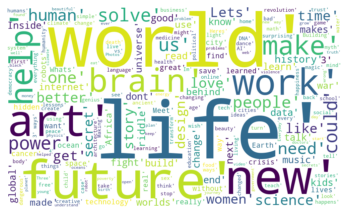

In [ ]:
final_text = " ".join(topic for topic in title_clean.astype(str))
print("Total {} words in the title.".format(len(final_text)))

wordcloud = WordCloud(background_color="white", width=1000, height=600).generate(final_text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (25,10)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = title_cleaning)
title_countvectorizer = vectorizer.fit_transform(title_nlp['title'])

In [ ]:
print(vectorizer.get_feature_names())

['0s', '1', '10', '100', '1000', '10000', '100000student', '100x', '101', '105', '11', '11yearold', '11yearolds', '12', '12yearold', '13m', '13thcentury', '13yearolds', '14', '15', '150mph', '16', '17', '17year', '18', '1901', '1918', '1984', '1994', '1s', '2', '20', '2000', '200year', '2016', '2030', '21', '21st', '21stcentury', '2200', '25', '2600', '3', '30', '30000', '3000foot', '3000year', '30year', '31', '317', '318yearold', '32', '3D', '3Dprinted', '3x', '4', '40', '404', '40year', '451', '4D', '5', '50', '500', '5000', '50cent', '50x15', '6', '66', '7', '79', '8', '80', '8dimensional', '9', '911', '99', 'ADHD', 'AI', 'AIDS', 'Abundance', 'Academic', 'Accents', 'Across', 'Activism', 'Actually', 'Addicted', 'Addiction', 'Adjustable', 'Admirals', 'Adventures', 'Advice', 'Afghan', 'Afghanistan', 'Africa', 'African', 'Africans', 'Africas', 'Afro', 'Afrobeat', 'Afterneath', 'Age', 'Agile', 'Aid', 'Air', 'Airbnb', 'Airstream', 'Alexandria', 'Alexandrias', 'Aliens', 'Allan', 'AlloSpher

In [ ]:
title_countvectorizer.shape

(4005, 5751)

In [ ]:
print(title_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
f2 = '/content/drive/MyDrive/Colab Notebooks/Cohort_Himalaya_AlmaBetter/ML_CAPSTONE/Capstone 3-Ted_Talk_Views_Prediction/Copy of cleaned_data.csv'
cleaned_df = pd.read_csv(f2)

In [ ]:
cleaned_df.head(2)

,talk_id,views,duration,recorded_date,published_date,event,topics,title,about_speakers,occupations,transcript,description,days_taken_to_publish,time_since_published,daily_views,topics_string,text_corpus
0,1,3523392,977,2006-02-25,2006-06-27,TED2006,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,Nobel Laureate Al Gore focused the world’s att...,climate advocate,"Thank you so much, Chris. And it's truly a gre...",With the same humor and humanity he exuded in ...,122 days,5056 days,696.735614,alternative energy cars climate change culture...,alternative energy cars climate change cultur...
1,92,14501685,1190,2006-02-22,2006-06-27,TED2006,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,"In Hans Rosling’s hands, data sings. Global tr...",global health expert; data visionary,"About 10 years ago, I took on the task to teac...",You've never seen data presented like this. Wi...,125 days,5056 days,2867.645837,Africa Asia Google demo economics global issue...,Africa Asia Google demo economics global issu...


#Model using Count Vectorizer

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


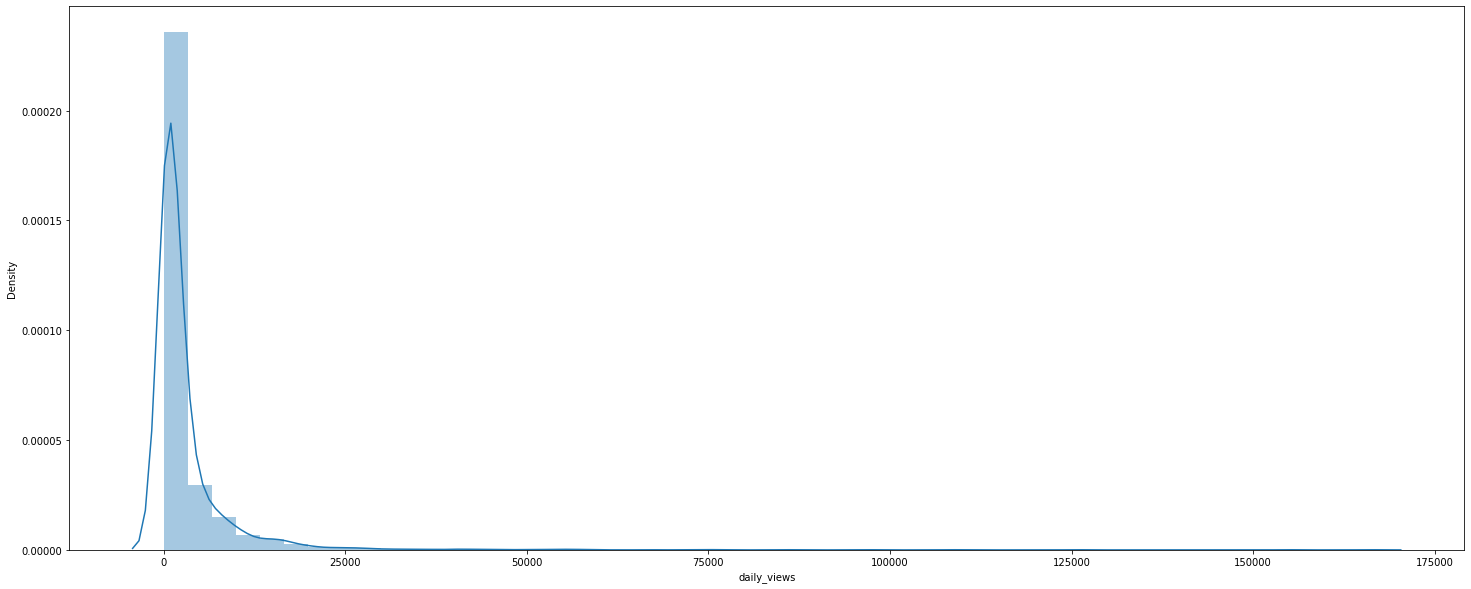

In [ ]:
sns.distplot(cleaned_df['daily_views'])

In [ ]:
X = title_countvectorizer
y = cleaned_df['views'].values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
y_train

array([[2087077],
       [1415402],
       [1011840],
       ...,
       [ 913460],
       [3333020],
       [1061300]])

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler1 = StandardScaler()
# y_train = scaler1.fit_transform(y_train)
# y_test = scaler1.transform(y_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()
y_train = scaler2.fit_transform(y_train)
y_test = scaler2.transform(y_test)

In [ ]:
X_train.shape, y_train.shape

((3204, 5751), (3204, 1))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth= 200, random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=200,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_pred_test = regressor.predict(X_test)

In [ ]:
y_pred_test

array([0.02140699, 0.02214835, 0.02214835, 0.02214835, 0.02214835,
       0.02214835, 0.02214835, 0.02214835, 0.01989604, 0.02214835,
       0.02214835, 0.02214835, 0.02214835, 0.02214835, 0.02214835,
       0.02214835, 0.02214835, 0.02214835, 0.02214835, 0.02214835,
       0.02214835, 0.02214835, 0.02214835, 0.02214835, 0.02214835,
       0.02214835, 0.02214835, 0.02214835, 0.02214835, 0.02214835,
       0.01340639, 0.02214835, 0.02214835, 0.03880351, 0.02214835,
       0.02214835, 0.02214835, 0.02214835, 0.02214835, 0.02214835,
       0.0174912 , 0.02214835, 0.02214835, 0.02377527, 0.02214835,
       0.02214835, 0.02214835, 0.02214835, 0.02214835, 0.02214835,
       0.02214835, 0.02214835, 0.02214835, 0.02214835, 0.01060837,
       0.03685091, 0.02214835, 0.02214835, 0.02214835, 0.02214835,
       0.02214835, 0.02377527, 0.02214835, 0.02214835, 0.02214835,
       0.02214835, 0.02214835, 0.02214835, 0.02214835, 0.02214835,
       0.02214835, 0.02214835, 0.02214835, 0.02214835, 0.02214

In [ ]:
y_pred_test.shape, y_test.shape

((801,), (801, 1))

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

0.003546426439133895
0.05955188023172648


In [ ]:
mae = mean_absolute_error(y_test, y_pred_test)
print(mae)

0.024410319283217675


#Using Tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
title_tfidf = TfidfTransformer().fit_transform(title_countvectorizer)
print(title_tfidf.shape)

(4005, 5751)


In [ ]:
X = title_tfidf
y = cleaned_df['daily_views'].values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler1 = StandardScaler()
# y_train = scaler1.fit_transform(y_train)
# y_test = scaler1.transform(y_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()
y_train = scaler2.fit_transform(y_train)
y_test = scaler2.transform(y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, max_depth=200, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=200, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred_test = regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

0.0021385349979558452
0.04624429692357583


In [ ]:
mae = mean_absolute_error(y_test, y_pred_test)
print(mae)

0.019495937619016496


In [ ]:
r2 = r2_score(y_test,y_pred_test)
print(r2)

0.058171305193988165


#CatBOost

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 27 kB/s 


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
model = CatBoostRegressor(iterations=50,
                          learning_rate=0.6,
                          depth=10)
model.fit(X_train, y_train)

0:	learn: 0.0414948	total: 145ms	remaining: 7.11s
1:	learn: 0.0394231	total: 290ms	remaining: 6.96s
2:	learn: 0.0377589	total: 435ms	remaining: 6.81s
3:	learn: 0.0362780	total: 583ms	remaining: 6.7s
4:	learn: 0.0350755	total: 728ms	remaining: 6.56s
5:	learn: 0.0339678	total: 877ms	remaining: 6.43s
6:	learn: 0.0329423	total: 1.03s	remaining: 6.35s
7:	learn: 0.0321537	total: 1.18s	remaining: 6.19s
8:	learn: 0.0314789	total: 1.32s	remaining: 6.03s
9:	learn: 0.0310169	total: 1.47s	remaining: 5.87s
10:	learn: 0.0305205	total: 1.62s	remaining: 5.74s
11:	learn: 0.0300100	total: 1.77s	remaining: 5.6s
12:	learn: 0.0294780	total: 1.92s	remaining: 5.46s
13:	learn: 0.0289461	total: 2.06s	remaining: 5.31s
14:	learn: 0.0282242	total: 2.21s	remaining: 5.17s
15:	learn: 0.0276655	total: 2.35s	remaining: 5s
16:	learn: 0.0272192	total: 2.5s	remaining: 4.85s
17:	learn: 0.0268135	total: 2.64s	remaining: 4.7s
18:	learn: 0.0264642	total: 2.79s	remaining: 4.56s
19:	learn: 0.0261188	total: 2.94s	remaining: 4.4

In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
print(mse)
rmse

0.0018850750232962113


0.043417450677074663

In [ ]:
mae = mean_absolute_error(y_test, y_pred_test)
print(mae)

0.019495937619016496


#MLP REGRESSOR

In [ ]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(hidden_layer_sizes=(10,), activation='relu',
         solver='adam', alpha=0.001, batch_size='auto',
         learning_rate='adaptive', learning_rate_init=0.01,
         power_t=0.5, max_iter=1000, shuffle=True, random_state=9,
         tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
         nesterovs_momentum=True, early_stopping=False,
         validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
         epsilon=1e-08).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_test_pred1 = regr.predict(X_test)

In [ ]:
regr.score(X_test, y_test)

-0.3303147377610038

In [ ]:
mse = mean_squared_error(y_test, y_test_pred1)
rmse = np.sqrt(mse)
print(mse)
rmse

0.003020639146680838


0.05496034158082388

In [ ]:
mae = mean_absolute_error(y_test, y_test_pred1)
print(mae)

0.03070296023454528


#XGB Regressor

In [ ]:
import xgboost as xgb

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[05:51:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(mse)
print("RMSE: %f" % (rmse))

0.029527025653263653
RMSE: 0.171834


In [ ]:
mae = mean_absolute_error(y_test,  preds)
print(mae)

0.1692659386976051
